# SI 618 Day 9: Dimension Reduction

Version 2023.03.07.3.CT

## Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/178npckIJAcp0vY2TEmg9Sn3sJYUYYDSAmw8_ouxZR7A/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10;
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

Install Open CV package: pip install opencv-python,
Install plotly : pip install plotly

In [ ]:
!pip install img

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import manifold

## Demo

Let's set up a really simple dataframe to play with:

In [ ]:
demo = pd.DataFrame({'a': [1, 2, 3, 1], 'b': [1, 4, 6, 1], 'c': [2, 4, 6, 3]},
                    index=['Chris', 'Xin', 'Arjun', 'Buko'])

In [ ]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


And then let's split the dataframe into X and y matrices:

In [ ]:
demo_X = demo.values

In [ ]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]])

In [ ]:
demo_y = demo.index

In [ ]:
demo_y

Index(['Chris', 'Xin', 'Arjun', 'Buko'], dtype='object')

## Multi-dimensional scaling (MDS)

In [ ]:
# It sees the distance. it ranks it from higher to lower.
# if it's metric=True, it knows the distances in metric and can display them in order of higher to lower dimension.
nmds = manifold.MDS(n_components=2,
                    metric=False,
                    max_iter=3000,
                    eps=1e-9,
                    random_state=42,
                    dissimilarity='euclidean',
                    normalized_stress='auto',
                    n_jobs=1)

In [ ]:
npos = nmds.fit_transform(demo_X)

In [ ]:
npos

array([[-0.25640198,  0.45035412],
       [ 0.10299116, -0.125423  ],
       [ 0.43708603, -0.41819504],
       [-0.28367521,  0.09326392]])

In [ ]:
npos_labelled = pd.concat([pd.DataFrame({'who': demo_y}), pd.DataFrame(npos)], axis=1)

In [ ]:
npos_labelled.columns = ['who', 'mds1', 'mds2']

In [ ]:
npos_labelled

,who,mds1,mds2
0,Chris,-0.256402,0.450354
1,Xin,0.102991,-0.125423
2,Arjun,0.437086,-0.418195
3,Buko,-0.283675,0.093264


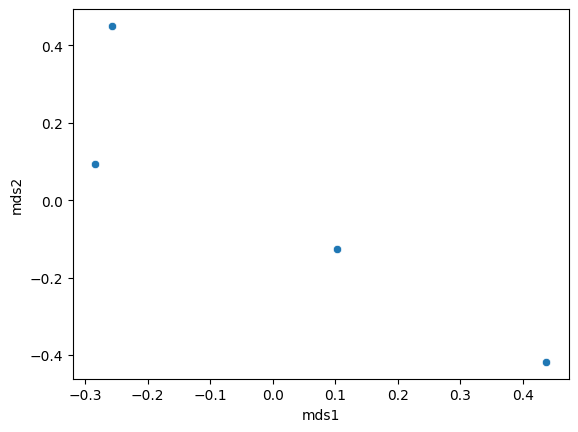

In [ ]:
p1 = sns.scatterplot(data=npos_labelled, x='mds1', y='mds2')

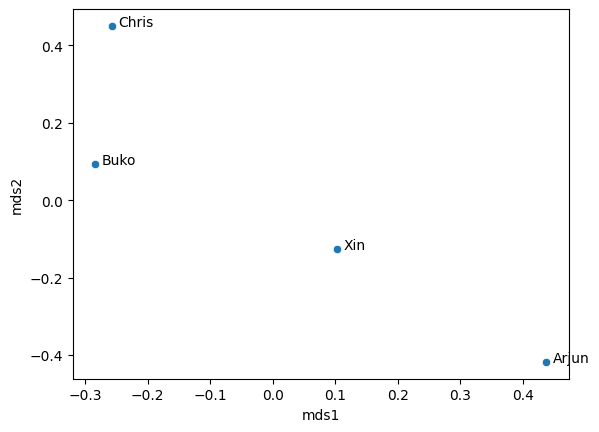

In [ ]:
# Based on https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
p1 = sns.scatterplot(data=npos_labelled, x='mds1', y='mds2')
for line in range(0, npos_labelled.shape[0]):
     p1.text(npos_labelled['mds1'][line]+0.01, npos_labelled['mds2'][line],
     npos_labelled['who'][line], horizontalalignment='left',
     size='medium', color='black')

In [ ]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        if data[labs][line] == 'Chris T':
            c = 'red'
        else:
            c = 'black'
        p1.text(data[x][line]+0.01, data[y][line],
                data[labs][line], horizontalalignment='left',
                size='medium', color=c)

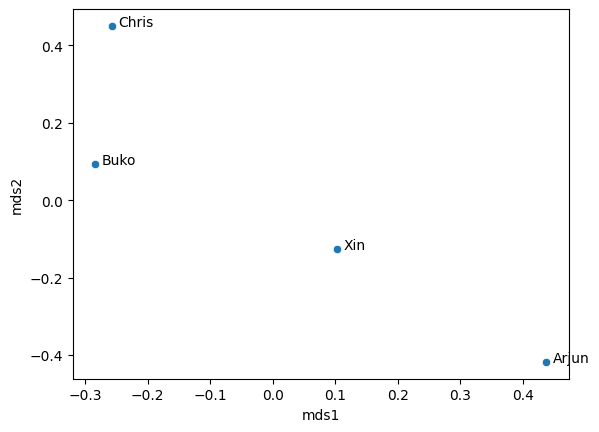

In [ ]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

EXAMPLE 2

In [ ]:
df = pd.DataFrame({'player': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
                   'points': [4, 4, 6, 7, 8, 14, 16, 19, 25, 25, 28],
                   'assists': [3, 2, 2, 5, 4, 8, 7, 6, 8, 10, 11],
                   'blocks': [7, 3, 6, 7, 5, 8, 8, 4, 2, 2, 1],
                   'rebounds': [4, 5, 5, 6, 5, 8, 10, 4, 3, 2, 2]})

In [ ]:
df = df.set_index('player')

In [ ]:
df.head()

,points,assists,blocks,rebounds
player,,,,
A,4,3,7,4
B,4,2,3,5
C,6,2,6,5
D,7,5,7,6
E,8,4,5,5


## Principal Components Analysis (PCA)

In [ ]:
demo

,a,b,c
Chris,1,1,2
Xin,2,4,4
Arjun,3,6,6
Buko,1,1,3


In [ ]:
from sklearn.preprocessing import scale
scale(demo_X)

array([[-0.90453403, -0.94280904, -1.18321596],
       [ 0.30151134,  0.47140452,  0.16903085],
       [ 1.50755672,  1.41421356,  1.52127766],
       [-0.90453403, -0.94280904, -0.50709255]])

In [ ]:
np.var([-1.29777, .016222, 1.135549])

0.9889454738615555

### ANALYSIS with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(demo_X))

In [ ]:
X_pca

array([[-1.74849588, -0.21383124],
       [ 0.54456683, -0.1913689 ],
       [ 2.56500363,  0.07178607],
       [-1.36107457,  0.33341407]])

In [ ]:
X_pca_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

In [ ]:
X_pca_labelled

,who,pca1,pca2
0,Chris,-1.748496,-0.213831
1,Xin,0.544567,-0.191369
2,Arjun,2.565004,0.071786
3,Buko,-1.361075,0.333414


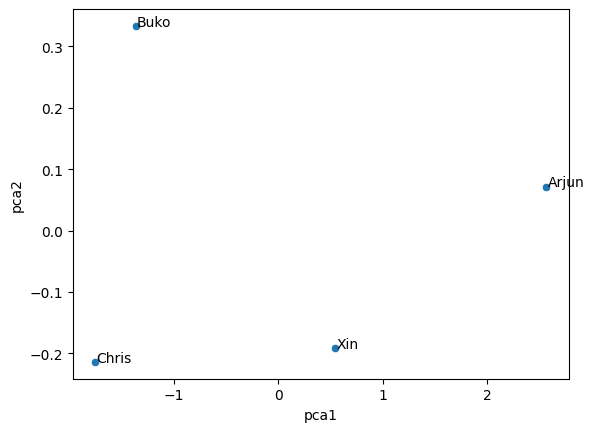

In [ ]:
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [ ]:
pca.explained_variance_

array([3.9285195 , 0.06622135])

In [ ]:
np.cov(X_pca)

array([[ 1.17759778, -0.56470727, -1.91312642,  1.3002359 ],
       [-0.56470727,  0.2708007 ,  0.91742394, -0.62351737],
       [-1.91312642,  0.91742394,  3.10806691, -2.11236443],
       [ 1.3002359 , -0.62351737, -2.11236443,  1.43564589]])

In [ ]:
pca.explained_variance_ratio_
# Loks at multicolinear activity between variables
# Columns are multicolinear and are fused together.
# Those who have max variance are pushed to front, else are pushed from PCA. Always do scaling before doing PCA.
# Always check if PCA1 has the highest variance in your dataset.

array([0.98212987, 0.01655534])

### Question:
What's the expected explained variance ratio for each variable?

In [ ]:
# labelled_scatterplot(npos_labelled)

### IMAGE Compression with PCA

In [ ]:
import cv2

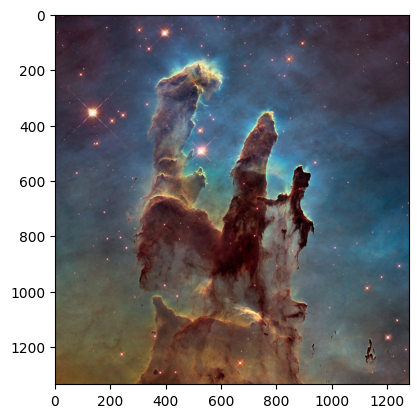

In [ ]:
img = cv2.cvtColor(cv2.imread('/content/pillars_of_creation.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(1335, 1280, 3)

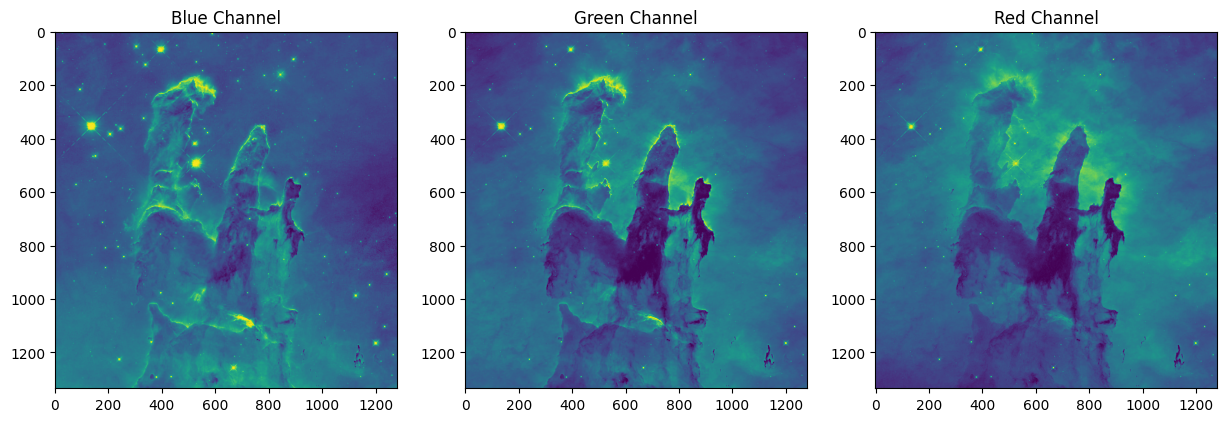

In [ ]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,44,44,41,42,46,46,43,43,33,31,...,53,50,46,55,59,55,54,57,55,48
1,48,47,47,47,47,46,41,37,39,35,...,50,46,46,53,56,54,53,55,53,49
2,54,47,49,50,42,39,40,31,48,42,...,52,50,48,51,52,52,51,52,52,52
3,56,45,45,43,32,34,38,30,48,43,...,52,50,51,51,51,51,51,50,52,55
4,49,40,44,44,33,34,39,33,43,42,...,53,52,54,52,51,51,50,50,54,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,118,118,119,121,123,120,121,123,121,121,...,101,101,109,114,112,109,112,112,109,109
1331,120,119,119,123,123,122,122,124,128,126,...,103,102,109,114,112,109,112,113,110,111
1332,120,120,120,123,124,122,124,126,123,122,...,105,102,109,114,112,108,112,112,110,110
1333,121,119,120,123,124,123,123,125,118,118,...,108,105,109,115,112,108,111,110,107,107


In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(60) # Instead of however many columns, make it just 20 columns
# The inverse transform lets us also see the inverse.

#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [ ]:
img_compressed = (np.dstack((blue_inverted, red_inverted, green_inverted))).astype(np.uint8)

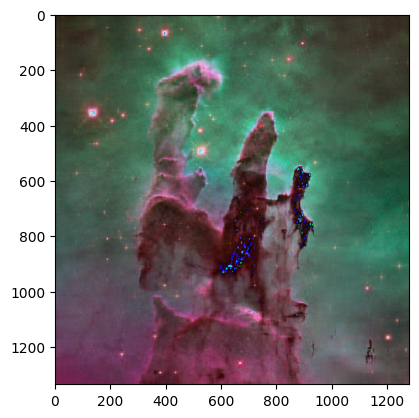

In [ ]:
plt.imshow(img_compressed)

**Answer:** for n variables, the expected explained variance for each variable is 1/n.

## t-SNE

In [ ]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE
# Controversial. In higher dimensions, it takes one point, measures distances to that point, and does that in lower dimension, then compares using a cost function to see which are higher rank.
# Used only for virtuialization. lets you be more granular than PCE.

In [ ]:
demo_X

array([[1, 1, 2],
       [2, 4, 4],
       [3, 6, 6],
       [1, 1, 3]])

In [ ]:
tsne = TSNE(n_components=2, perplexity=2, random_state=0) # Needs init. Perplexity is how many points to compare with each point.
X = demo_X.copy()
X_2d = tsne.fit_transform(X)

In [ ]:
X_2d

array([[ 480.45862, -111.71963],
       [-348.12817,  -88.04702],
       [-684.47345, -200.03996],
       [ 219.88858,  141.66884]], dtype=float32)

In [ ]:
tsne_labelled = pd.concat([pd.DataFrame({'who':demo_y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

In [ ]:
tsne_labelled

,who,d1,d2
0,Chris,480.458618,-111.719627
1,Xin,-348.128174,-88.047020
2,Arjun,-684.473450,-200.039963
3,Buko,219.888580,141.668839


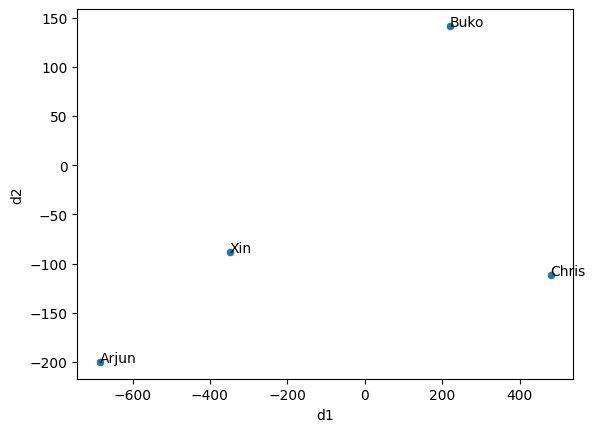

In [ ]:
labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='who')

Difference between t-SNEA and PCA

In [ ]:
churn_data = pd.read_csv("/content/customer_churn.csv")
churn_data.head(3)

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [ ]:
import plotly.express as px

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

In [ ]:
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_norm)


In [ ]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Customer Churn dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

How do you decide labels for this data?


### t-SNE demo
https://cs.stanford.edu/people/karpathy/tsnejs/csvdemo.html

# In your groups

Let's read the CSV file of the music data we generated at the start of today's class:

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTRe8guKi6zKf4_rQr8BiNmb2-V1Qq72vV7ZqSQ9Upeo6TsBtgFyZ4kk_IJgGdXx6kPdJP6NC_s_HOO/pub?gid=0&single=true&output=csv"
music = pd.read_csv(url)

In [ ]:
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Alex T,8.0,6.0,9.0,9.0,9.0,10.0,8.0,8.0,9.0,10.0
1,Anne Chang,8.0,10.0,3.0,8.0,8.0,5.0,8.0,7.0,5.0,5.0
2,Arthur C.,5.0,9.0,4.0,8.0,8.0,5.0,5.0,5.0,5.0,5.0
3,Athena Fan,5.0,3.0,5.0,8.0,8.0,7.0,5.0,4.0,9.0,9.0
4,Bella,5.0,5.0,4.0,7.0,5.0,8.0,3.0,8.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
128,Erika A.,1.0,6.0,1.0,10.0,2.0,6.0,4.0,3.0,4.0,4.0
129,Zidan H,2.0,8.0,5.0,4.0,3.0,4.0,5.0,5.0,8.0,5.0
130,Shu Ting Lin,3.0,8.0,4.0,2.0,8.0,6.0,8.0,4.0,5.0,1.0
131,Fangqing Lin,3.0,6.0,7.0,6.0,5.0,9.0,4.0,6.0,9.0,8.0


In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        133 non-null    object 
 1   Blues       132 non-null    float64
 2   Classical   132 non-null    float64
 3   Country     132 non-null    float64
 4   Electronic  132 non-null    float64
 5   Folk        132 non-null    float64
 6   Hip Hop     132 non-null    float64
 7   Jazz        132 non-null    float64
 8   Latin       132 non-null    float64
 9   Pop         132 non-null    float64
 10  Rock        131 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.6+ KB


In [ ]:
music.describe()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,131.000000
mean,5.401515,6.560606,5.757576,5.378788,5.151515,6.166667,6.234848,4.901515,7.431818,6.435115
std,2.220171,2.224971,2.477752,2.602202,2.263163,2.676350,2.327597,2.369848,2.172673,2.890566
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,3.000000,3.000000,4.750000,4.750000,3.000000,6.000000,4.000000
50%,5.000000,7.000000,6.000000,5.000000,5.000000,7.000000,6.000000,5.000000,8.000000,7.000000
75%,7.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: >

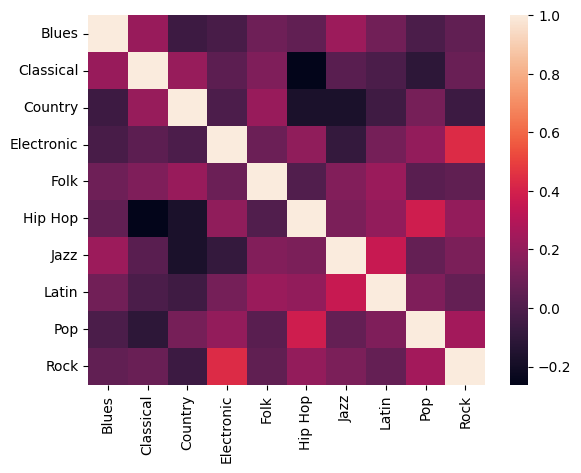

In [ ]:
sns.heatmap(music.corr(numeric_only=True))

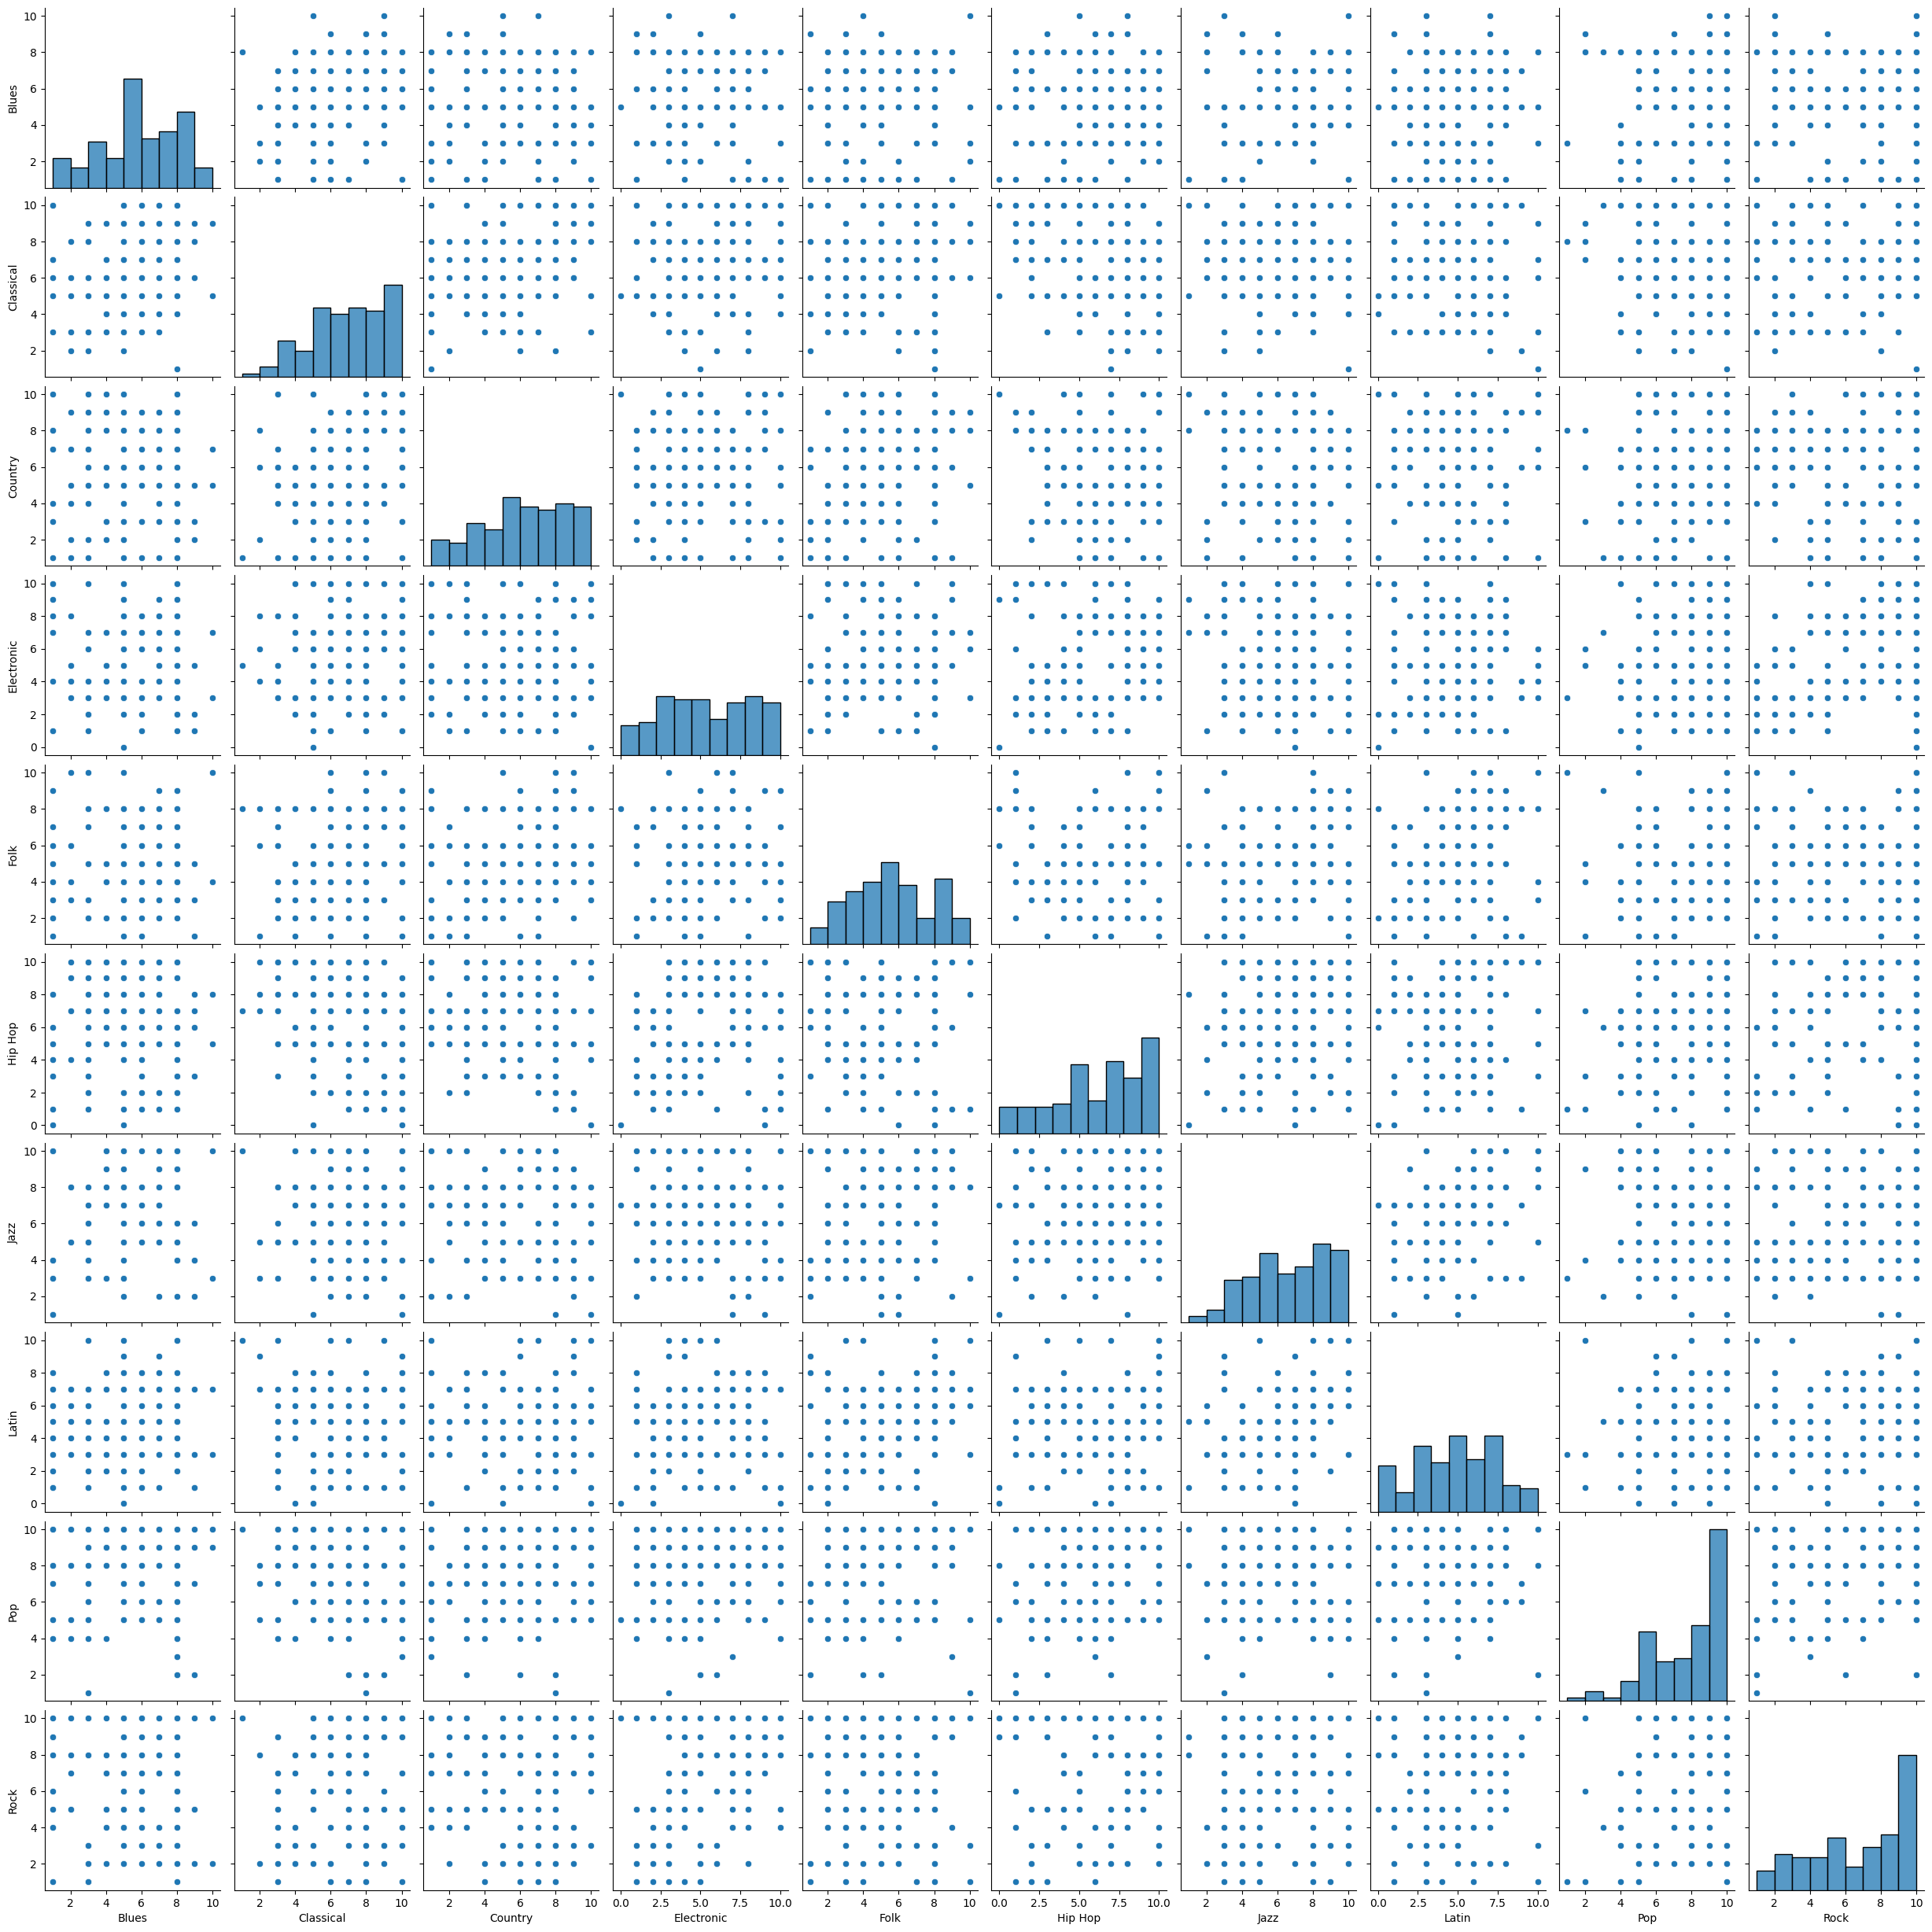

In [ ]:
sns.pairplot(music)

In [ ]:
X = music.drop('Name', axis=1)

In [ ]:
y = music.Name

In [ ]:
X2 = X.fillna(value=1) # Can drop instead. In this case, we're assuming if they don't fill it in, they don't like it.

## Task
Create X (features matrix) and y (labels matrix) from the `music` dataframe:

In [ ]:
npos = nmds.fit_transform(X2)

In [ ]:
npos_labelled = pd.concat([pd.DataFrame({'who': y}), pd.DataFrame(npos)], axis=1)
npos_labelled.columns = ['who', 'mds1', 'mds2']
npos_labelled

,who,mds1,mds2
0,Alex T,-0.079321,0.431032
1,Anne Chang,0.196613,0.143879
2,Arthur C.,-0.348021,-0.311064
3,Athena Fan,-0.316588,0.287587
4,Bella,0.079458,0.245274
...,...,...,...
128,Erika A.,0.646904,0.280602
129,Zidan H,0.099625,-0.576667
130,Shu Ting Lin,0.159200,0.739975
131,Fangqing Lin,-0.538869,0.034962


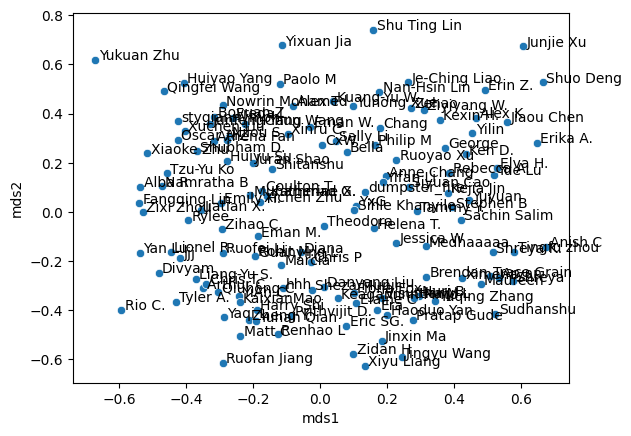

In [ ]:
labelled_scatterplot(npos_labelled,'mds1','mds2','who')

## Task
Perform a multi-dimensional scaling on the music data.  Should you use metric or non-metric MDS?  Do the
results differ between metric and non-metric?  Visualize your results.

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X2)

In [ ]:
pca.explained_variance_ratio_

array([0.23819988, 0.14908282, 0.14136256])

## Task
Perform a principal components analysis (PCA) on the music data.  Do you think you should scale the data before you
do the PCA?  How many principal components should you retain (hint: look at a scree plot and/or eigenvalues, a.k.a. the explained_variance_ attribute of the PCA model).  Visualize your results.

### Visualizing principal components

In [ ]:
def pca_results(data, columns, pca):

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=columns)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)



In [ ]:
# pcax = pca_results(X_pca, music.drop['Name'], axis=1)

## Task
Perform a t-SNE analysis of the music data.  Experiment with different hyperparameters (i.e. perplexity and n_iter) to see how your solution changes.  Visualize your results.

In [ ]:
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


In [ ]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Music Preferences Dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

## Task
Compare the three analyses (MDS, PCA, and t-SNE).  Comment on similarities and differences.  What do you think the best technique is to use with the music data?

Insert your answer here.

## Stretch task

Use a Pipeline to perform a PCA on the music data.

## A few words about pipelines

Consider the following pipeline:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

In [ ]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42))])

The pipeline can be queried by using `get_params()`:

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [ ]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [ ]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [ ]:
pipe.named_steps.pca.n_components=3

In [ ]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

In [ ]:
# Ignore, these are my personal instructions for html conversion.
# Format as: !jupyter nbconvert /content/mynotebook.ipynb --to html
# To use, download and re-upload  ipnyb to make it a file on Colab
# Then, uncomment and run the cell below. Download and submit the HTML.
!jupyter nbconvert '/content/SI_618_Day_09_Dimension_Reduction_Inclass_1.ipynb' --to html

[NbConvertApp] Converting notebook /content/SI_618_Day_09_Dimension_Reduction_Inclass_1.ipynb to html
[NbConvertApp] Writing 2933287 bytes to /content/SI_618_Day_09_Dimension_Reduction_Inclass_1.html
